In [ ]:
! pip install scikit-learn
! pip install xgboost
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

### Please note that you can find here the code for the following Algorithms:
- Logistic Regression
- Decision Tree
- Random Forest
- Gaussian Naive Bayes
- Support Vector Machine
- K-Nearest Neighbors
- AdaBoost
- Gradient Boosting
- XGBoost
- mlpclassifier
### Please note that I depended on the following approach:
- Each model in a dictionary
- Then add different `param_grids` regarding each model
- Then using the `evaluate_model` function to start fitting and testing the results using each algorithm
    - Doing a loop in `[100, 200, 300, 400, 500]` to see the results on each split
    - Splitting the data
    - Predicting the data based on `X_test`
    - Calculating the accuracy and other metrics

Then for clarification purposes, I use `evaluate_model` on each name of the model.

### How to approach the results:
- Please note that you can go to the results as the following:
    - On each call for each model you can find different metrics and classification report
    - On each call you can find the results of metrics and showing on which time frame that was used
    - On each call you will be able to see the results of the best model and parameters

In [ ]:
# Here where i have the models and the paramGrids

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gaussian Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

param_grids = {
    'Logistic Regression': {
        'penalty': ['l2', None],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['newton-cg', 'lbfgs']
    },
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Gaussian Naive Bayes': {},
    'Support Vector Machine': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    },
    'Gradient Boosting': {
        'n_estimators': [50],
        'learning_rate': [0.8, 1],
        'max_depth': [3, 5]
    },
    'XGBoost': {
        'n_estimators': [50, 100],
        'learning_rate':  [0.1,1],
        'max_depth': [3, 5]
    }
}

def evaluate_model(model_name):
    for i in [100,200,300,400,500]:
        features_df = pd.read_csv(r"\\wsl.localhost\Ubuntu\home\aibak\machine_learning_Final_project\result_df"+str(i)+".csv")
        features_df['expId'] = features_df['expId'].apply(lambda x: x - 1)
        features_df.drop_duplicates(inplace=True)

        X = features_df.drop(columns=['expId'])
        y = features_df['expId']

        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
        model = models[model_name]
        param_grid = param_grids[model_name]

        kfold = KFold(n_splits=5, shuffle=True, random_state=42)

        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            scoring='accuracy',
            cv=kfold,
            n_jobs=-1,
        )
        randomized_search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grid,
            n_iter=50,
            scoring='accuracy',
            cv=kfold,
            random_state=42,
            n_jobs=-1,
        )
        grid_search.fit(X_train, y_train)
        randomized_search.fit(X_train, y_train)
        best_model_grid = grid_search.best_estimator_
        y_pred_grid = best_model_grid.predict(X_test)

        best_model_random = randomized_search.best_estimator_
        y_pred_random = best_model_random.predict(X_test)

        print(f"window_size:{i}_ Model: ")

        print(f"{model_name} - Grid Search Best Parameters:", grid_search.best_params_)
        print(f"{model_name} - Grid Search Best Score:", grid_search.best_score_)

        print(f"{model_name} - Randomized Search Best Parameters:", randomized_search.best_params_)
        print(f"{model_name} - Randomized Search Best Score:", randomized_search.best_score_)

        print(f"{model_name} - Testing Set Performance (Grid Search):")
        print(f"{model_name} - Accuracy:", accuracy_score(y_test, y_pred_grid))
        print(f"{model_name} - Classification Report:\n", classification_report(y_test, y_pred_grid))

        print(f"{model_name} - Testing Set Performance (Randomized Search):")
        print(f"{model_name} - Accuracy:", accuracy_score(y_test, y_pred_random))
        print(f"{model_name} - Classification Report:\n", classification_report(y_test, y_pred_random))

In [16]:
evaluate_model("Logistic Regression")

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


window_size:100_ Model: 
Logistic Regression - Grid Search Best Parameters: {'C': 0.01, 'penalty': None, 'solver': 'newton-cg'}
Logistic Regression - Grid Search Best Score: 0.9847464421727802
Logistic Regression - Randomized Search Best Parameters: {'solver': 'newton-cg', 'penalty': None, 'C': 0.01}
Logistic Regression - Randomized Search Best Score: 0.9847464421727802
Logistic Regression - Testing Set Performance (Grid Search):
Logistic Regression - Accuracy: 0.9841257115369197
Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1148
           1       0.99      0.99      0.99      1092
           2       0.99      0.99      0.99      1117
           3       0.97      0.97      0.97      1139
           4       0.99      0.99      0.99      1192
           5       0.97      0.96      0.96      1082
           6       0.98      0.99      0.99      1179
           7       0.98      0.98   

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:200_ Model: 
Logistic Regression - Grid Search Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Logistic Regression - Grid Search Best Score: 0.989317224933288
Logistic Regression - Randomized Search Best Parameters: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 100}
Logistic Regression - Randomized Search Best Score: 0.989317224933288
Logistic Regression - Testing Set Performance (Grid Search):
Logistic Regression - Accuracy: 0.9876900796524257
Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       334
           1       0.99      1.00      0.99       403
           2       1.00      0.99      0.99       377
           3       1.00      0.99      1.00       378
           4       0.98      0.99      0.98       418
           5       0.99      0.97      0.98       372
           6       0.99      0.98      0.99       392
           7       0.98      0.99      0

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:300_ Model: 
Logistic Regression - Grid Search Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression - Grid Search Best Score: 0.9892812848260558
Logistic Regression - Randomized Search Best Parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}
Logistic Regression - Randomized Search Best Score: 0.9892812848260558
Logistic Regression - Testing Set Performance (Grid Search):
Logistic Regression - Accuracy: 0.9923170238576627
Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       245
           1       1.00      1.00      1.00       227
           2       0.99      0.99      0.99       208
           3       1.00      1.00      1.00       228
           4       0.99      0.99      0.99       238
           5       0.99      1.00      0.99       227
           6       0.99      0.99      0.99       234
           7       0.99      0.99      0.99     

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:400_ Model: 
Logistic Regression - Grid Search Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Logistic Regression - Grid Search Best Score: 0.9882234269060598
Logistic Regression - Randomized Search Best Parameters: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 10}
Logistic Regression - Randomized Search Best Score: 0.9882234269060598
Logistic Regression - Testing Set Performance (Grid Search):
Logistic Regression - Accuracy: 0.9909245604083948
Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       182
           1       1.00      0.99      1.00       144
           2       1.00      1.00      1.00       161
           3       0.99      1.00      1.00       136
           4       0.99      0.98      0.99       180
           5       0.99      1.00      1.00       152
           6       0.98      0.99      0.99       167
           7       0.98      0.99      0

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:500_ Model: 
Logistic Regression - Grid Search Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression - Grid Search Best Score: 0.9864517458753508
Logistic Regression - Randomized Search Best Parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}
Logistic Regression - Randomized Search Best Score: 0.9864517458753508
Logistic Regression - Testing Set Performance (Grid Search):
Logistic Regression - Accuracy: 0.986822840409956
Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       152
           1       0.99      0.97      0.98       116
           2       1.00      0.99      1.00       129
           3       1.00      0.98      0.99       132
           4       0.99      0.99      0.99       116
           5       0.99      1.00      1.00       113
           6       1.00      0.97      0.99       109
           7       0.99      0.98      0.99      

In [17]:
evaluate_model("Decision Tree")

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:100_ Model: 
Decision Tree - Grid Search Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
Decision Tree - Grid Search Best Score: 0.9987171777911404
Decision Tree - Randomized Search Best Parameters: {'min_samples_split': 2, 'max_depth': 10, 'criterion': 'entropy'}
Decision Tree - Randomized Search Best Score: 0.9987171777911404
Decision Tree - Testing Set Performance (Grid Search):
Decision Tree - Accuracy: 0.9984767096929368
Decision Tree - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1148
           1       1.00      1.00      1.00      1092
           2       1.00      1.00      1.00      1117
           3       1.00      1.00      1.00      1139
           4       1.00      1.00      1.00      1192
           5       1.00      1.00      1.00      1082
           6       1.00      1.00      1.00      1179
           7       1.00      1.00      1.00      1

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:200_ Model: 
Decision Tree - Grid Search Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
Decision Tree - Grid Search Best Score: 0.9960165883342826
Decision Tree - Randomized Search Best Parameters: {'min_samples_split': 2, 'max_depth': None, 'criterion': 'entropy'}
Decision Tree - Randomized Search Best Score: 0.9960165883342826
Decision Tree - Testing Set Performance (Grid Search):
Decision Tree - Accuracy: 0.99637943519189
Decision Tree - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       334
           1       0.99      1.00      0.99       403
           2       1.00      1.00      1.00       377
           3       1.00      0.99      0.99       378
           4       1.00      1.00      1.00       418
           5       0.99      1.00      1.00       372
           6       0.99      0.99      0.99       392
           7       0.99      0.99      0.99     

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:300_ Model: 
Decision Tree - Grid Search Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5}
Decision Tree - Grid Search Best Score: 0.9936295712115004
Decision Tree - Randomized Search Best Parameters: {'min_samples_split': 5, 'max_depth': None, 'criterion': 'entropy'}
Decision Tree - Randomized Search Best Score: 0.9936295712115004
Decision Tree - Testing Set Performance (Grid Search):
Decision Tree - Accuracy: 0.9967650626769107
Decision Tree - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       245
           1       1.00      1.00      1.00       227
           2       0.99      1.00      1.00       208
           3       1.00      0.99      0.99       228
           4       1.00      1.00      1.00       238
           5       1.00      1.00      1.00       227
           6       1.00      1.00      1.00       234
           7       1.00      0.99      1.00   

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:400_ Model: 
Decision Tree - Grid Search Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
Decision Tree - Grid Search Best Score: 0.9903518918401965
Decision Tree - Randomized Search Best Parameters: {'min_samples_split': 2, 'max_depth': None, 'criterion': 'entropy'}
Decision Tree - Randomized Search Best Score: 0.9903518918401965
Decision Tree - Testing Set Performance (Grid Search):
Decision Tree - Accuracy: 0.994895065229722
Decision Tree - Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       182
           1       0.99      0.99      0.99       144
           2       1.00      1.00      1.00       161
           3       0.99      0.99      0.99       136
           4       1.00      1.00      1.00       180
           5       0.99      0.99      0.99       152
           6       0.99      1.00      1.00       167
           7       1.00      1.00      1.00    

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:500_ Model: 
Decision Tree - Grid Search Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Decision Tree - Grid Search Best Score: 0.9904800445056621
Decision Tree - Randomized Search Best Parameters: {'min_samples_split': 2, 'max_depth': None, 'criterion': 'gini'}
Decision Tree - Randomized Search Best Score: 0.9904800445056621
Decision Tree - Testing Set Performance (Grid Search):
Decision Tree - Accuracy: 0.9948755490483162
Decision Tree - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00       116
           2       1.00      0.98      0.99       129
           3       0.99      0.98      0.98       132
           4       1.00      1.00      1.00       116
           5       0.99      1.00      1.00       113
           6       0.99      0.99      0.99       109
           7       1.00      1.00      1.00       12

In [18]:
evaluate_model("Random Forest")

window_size:100_ Model: 
Random Forest - Grid Search Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest - Grid Search Best Score: 0.9998396472238925
Random Forest - Randomized Search Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 20, 'criterion': 'gini'}
Random Forest - Randomized Search Best Score: 0.9998396472238925
Random Forest - Testing Set Performance (Grid Search):
Random Forest - Accuracy: 0.9998396536518881
Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1148
           1       1.00      1.00      1.00      1092
           2       1.00      1.00      1.00      1117
           3       1.00      1.00      1.00      1139
           4       1.00      1.00      1.00      1192
           5       1.00      1.00      1.00      1082
           6       1.00      1.00      1.00      1179
           7  

In [19]:
evaluate_model("Gaussian Naive Bayes")

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:100_ Model: 
Gaussian Naive Bayes - Grid Search Best Parameters: {}
Gaussian Naive Bayes - Grid Search Best Score: 0.9575265584285428
Gaussian Naive Bayes - Randomized Search Best Parameters: {}
Gaussian Naive Bayes - Randomized Search Best Score: 0.9575265584285428
Gaussian Naive Bayes - Testing Set Performance (Grid Search):
Gaussian Naive Bayes - Accuracy: 0.9553435420508298
Gaussian Naive Bayes - Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      1148
           1       0.99      0.95      0.97      1092
           2       0.96      0.99      0.98      1117
           3       0.96      0.94      0.95      1139
           4       0.91      0.96      0.94      1192
           5       0.90      0.96      0.93      1082
           6       0.97      0.96      0.96      1179
           7       0.90      0.94      0.92      1052
           8       0.97      0.95      0.96      1136
           9       

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:200_ Model: 
Gaussian Naive Bayes - Grid Search Best Parameters: {}
Gaussian Naive Bayes - Grid Search Best Score: 0.9557607136787268
Gaussian Naive Bayes - Randomized Search Best Parameters: {}
Gaussian Naive Bayes - Randomized Search Best Score: 0.9557607136787268
Gaussian Naive Bayes - Testing Set Performance (Grid Search):
Gaussian Naive Bayes - Accuracy: 0.9531740284817765
Gaussian Naive Bayes - Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       334
           1       1.00      0.94      0.97       403
           2       0.99      0.96      0.97       377
           3       0.99      0.95      0.97       378
           4       0.82      0.99      0.89       418
           5       0.91      0.95      0.93       372
           6       1.00      0.94      0.97       392
           7       0.97      0.95      0.96       329
           8       0.92      0.96      0.94       391
           9       

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:300_ Model: 
Gaussian Naive Bayes - Grid Search Best Parameters: {}
Gaussian Naive Bayes - Grid Search Best Score: 0.941350096381389
Gaussian Naive Bayes - Randomized Search Best Parameters: {}
Gaussian Naive Bayes - Randomized Search Best Score: 0.941350096381389
Gaussian Naive Bayes - Testing Set Performance (Grid Search):
Gaussian Naive Bayes - Accuracy: 0.9543065103113627
Gaussian Naive Bayes - Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97       245
           1       0.99      0.96      0.98       227
           2       0.96      0.90      0.93       208
           3       0.97      0.94      0.96       228
           4       0.85      0.97      0.90       238
           5       0.92      0.97      0.95       227
           6       1.00      0.95      0.97       234
           7       0.95      0.95      0.95       198
           8       0.95      0.97      0.96       202
           9       1.

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:400_ Model: 
Gaussian Naive Bayes - Grid Search Best Parameters: {}
Gaussian Naive Bayes - Grid Search Best Score: 0.9533193402090916
Gaussian Naive Bayes - Randomized Search Best Parameters: {}
Gaussian Naive Bayes - Randomized Search Best Score: 0.9533193402090916
Gaussian Naive Bayes - Testing Set Performance (Grid Search):
Gaussian Naive Bayes - Accuracy: 0.952921157118548
Gaussian Naive Bayes - Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       182
           1       0.98      0.92      0.95       144
           2       0.99      0.96      0.97       161
           3       0.98      0.96      0.97       136
           4       0.87      0.96      0.91       180
           5       0.89      0.99      0.94       152
           6       0.98      0.98      0.98       167
           7       0.97      0.93      0.95       152
           8       0.93      0.97      0.95       174
           9       0

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:500_ Model: 
Gaussian Naive Bayes - Grid Search Best Parameters: {}
Gaussian Naive Bayes - Grid Search Best Score: 0.9540457255461832
Gaussian Naive Bayes - Randomized Search Best Parameters: {}
Gaussian Naive Bayes - Randomized Search Best Score: 0.9540457255461832
Gaussian Naive Bayes - Testing Set Performance (Grid Search):
Gaussian Naive Bayes - Accuracy: 0.9502196193265008
Gaussian Naive Bayes - Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       152
           1       1.00      0.92      0.96       116
           2       0.99      0.95      0.97       129
           3       0.99      0.91      0.95       132
           4       0.81      0.97      0.89       116
           5       0.85      0.98      0.91       113
           6       1.00      0.94      0.97       109
           7       0.99      0.93      0.96       122
           8       0.93      0.97      0.95       127
           9       

In [20]:
evaluate_model("Support Vector Machine")

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 18 is smaller than n_iter=50. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:100_ Model: 
Support Vector Machine - Grid Search Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Support Vector Machine - Grid Search Best Score: 0.9981759871717779
Support Vector Machine - Randomized Search Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
Support Vector Machine - Randomized Search Best Score: 0.9981759871717779
Support Vector Machine - Testing Set Performance (Grid Search):
Support Vector Machine - Accuracy: 0.997835324300489
Support Vector Machine - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1148
           1       1.00      1.00      1.00      1092
           2       1.00      1.00      1.00      1117
           3       1.00      1.00      1.00      1139
           4       1.00      1.00      1.00      1192
           5       0.99      1.00      0.99      1082
           6       1.00      1.00      1.00      1179
           7       1.00      1

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 18 is smaller than n_iter=50. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:200_ Model: 
Support Vector Machine - Grid Search Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Support Vector Machine - Grid Search Best Score: 0.9968615980534974
Support Vector Machine - Randomized Search Best Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'C': 10}
Support Vector Machine - Randomized Search Best Score: 0.9968615980534974
Support Vector Machine - Testing Set Performance (Grid Search):
Support Vector Machine - Accuracy: 0.997103548153512
Support Vector Machine - Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       334
           1       1.00      1.00      1.00       403
           2       0.99      1.00      1.00       377
           3       1.00      1.00      1.00       378
           4       1.00      1.00      1.00       418
           5       0.99      1.00      0.99       372
           6       1.00      0.99      0.99       392
           7       1.00      1.0

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 18 is smaller than n_iter=50. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:300_ Model: 
Support Vector Machine - Grid Search Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Support Vector Machine - Grid Search Best Score: 0.9967641527720454
Support Vector Machine - Randomized Search Best Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'C': 10}
Support Vector Machine - Randomized Search Best Score: 0.9967641527720454
Support Vector Machine - Testing Set Performance (Grid Search):
Support Vector Machine - Accuracy: 0.997573797007683
Support Vector Machine - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       245
           1       1.00      1.00      1.00       227
           2       1.00      0.99      1.00       208
           3       1.00      1.00      1.00       228
           4       1.00      1.00      1.00       238
           5       0.99      1.00      0.99       227
           6       1.00      1.00      1.00       234
           7       0.99      1.0

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 18 is smaller than n_iter=50. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:400_ Model: 
Support Vector Machine - Grid Search Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Support Vector Machine - Grid Search Best Score: 0.9967367832928138
Support Vector Machine - Randomized Search Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
Support Vector Machine - Randomized Search Best Score: 0.9967367832928138
Support Vector Machine - Testing Set Performance (Grid Search):
Support Vector Machine - Accuracy: 0.9960294951786727
Support Vector Machine - Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       182
           1       1.00      1.00      1.00       144
           2       1.00      0.99      1.00       161
           3       0.99      1.00      1.00       136
           4       0.99      0.99      0.99       180
           5       0.99      1.00      0.99       152
           6       1.00      1.00      1.00       167
           7       0.99      

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 18 is smaller than n_iter=50. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:500_ Model: 
Support Vector Machine - Grid Search Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Support Vector Machine - Grid Search Best Score: 0.9928603266206194
Support Vector Machine - Randomized Search Best Parameters: {'kernel': 'poly', 'gamma': 'scale', 'C': 10}
Support Vector Machine - Randomized Search Best Score: 0.9928603266206194
Support Vector Machine - Testing Set Performance (Grid Search):
Support Vector Machine - Accuracy: 0.9992679355783309
Support Vector Machine - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00       116
           2       1.00      1.00      1.00       129
           3       1.00      0.99      1.00       132
           4       1.00      1.00      1.00       116
           5       1.00      1.00      1.00       113
           6       1.00      1.00      1.00       109
           7       1.00    

In [21]:
evaluate_model("K-Nearest Neighbors")

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:100_ Model: 
K-Nearest Neighbors - Grid Search Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
K-Nearest Neighbors - Grid Search Best Score: 0.9995991180597315
K-Nearest Neighbors - Randomized Search Best Parameters: {'weights': 'uniform', 'n_neighbors': 3, 'metric': 'manhattan'}
K-Nearest Neighbors - Randomized Search Best Score: 0.9995991180597315
K-Nearest Neighbors - Testing Set Performance (Grid Search):
K-Nearest Neighbors - Accuracy: 0.9995189609556643
K-Nearest Neighbors - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1148
           1       1.00      1.00      1.00      1092
           2       1.00      1.00      1.00      1117
           3       1.00      1.00      1.00      1139
           4       1.00      1.00      1.00      1192
           5       1.00      1.00      1.00      1082
           6       1.00      1.00      1.00      1179
           7

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:200_ Model: 
K-Nearest Neighbors - Grid Search Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
K-Nearest Neighbors - Grid Search Best Score: 0.9995171815424724
K-Nearest Neighbors - Randomized Search Best Parameters: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan'}
K-Nearest Neighbors - Randomized Search Best Score: 0.9995171815424724
K-Nearest Neighbors - Testing Set Performance (Grid Search):
K-Nearest Neighbors - Accuracy: 0.9995172580255853
K-Nearest Neighbors - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       334
           1       1.00      1.00      1.00       403
           2       1.00      1.00      1.00       377
           3       1.00      1.00      1.00       378
           4       1.00      1.00      1.00       418
           5       1.00      1.00      1.00       372
           6       1.00      1.00      1.00       392
          

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:300_ Model: 
K-Nearest Neighbors - Grid Search Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
K-Nearest Neighbors - Grid Search Best Score: 0.9992921632136609
K-Nearest Neighbors - Randomized Search Best Parameters: {'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan'}
K-Nearest Neighbors - Randomized Search Best Score: 0.9992921632136609
K-Nearest Neighbors - Testing Set Performance (Grid Search):
K-Nearest Neighbors - Accuracy: 0.9995956328346138
K-Nearest Neighbors - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       245
           1       1.00      1.00      1.00       227
           2       1.00      1.00      1.00       208
           3       1.00      1.00      1.00       228
           4       1.00      1.00      1.00       238
           5       1.00      1.00      1.00       227
           6       1.00      1.00      1.00       234
          

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:400_ Model: 
K-Nearest Neighbors - Grid Search Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
K-Nearest Neighbors - Grid Search Best Score: 0.9991487348302958
K-Nearest Neighbors - Randomized Search Best Parameters: {'weights': 'uniform', 'n_neighbors': 7, 'metric': 'manhattan'}
K-Nearest Neighbors - Randomized Search Best Score: 0.9991487348302958
K-Nearest Neighbors - Testing Set Performance (Grid Search):
K-Nearest Neighbors - Accuracy: 0.9994327850255247
K-Nearest Neighbors - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       1.00      1.00      1.00       144
           2       1.00      1.00      1.00       161
           3       1.00      1.00      1.00       136
           4       1.00      1.00      1.00       180
           5       1.00      1.00      1.00       152
           6       1.00      1.00      1.00       167
           7

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:500_ Model: 
K-Nearest Neighbors - Grid Search Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
K-Nearest Neighbors - Grid Search Best Score: 0.9994508845835469
K-Nearest Neighbors - Randomized Search Best Parameters: {'weights': 'uniform', 'n_neighbors': 3, 'metric': 'manhattan'}
K-Nearest Neighbors - Randomized Search Best Score: 0.9994508845835469
K-Nearest Neighbors - Testing Set Performance (Grid Search):
K-Nearest Neighbors - Accuracy: 1.0
K-Nearest Neighbors - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00       116
           2       1.00      1.00      1.00       129
           3       1.00      1.00      1.00       132
           4       1.00      1.00      1.00       116
           5       1.00      1.00      1.00       113
           6       1.00      1.00      1.00       109
           7       1.00    

In [22]:
evaluate_model("AdaBoost")

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=50. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning

window_size:100_ Model: 
AdaBoost - Grid Search Best Parameters: {'learning_rate': 0.01, 'n_estimators': 100}
AdaBoost - Grid Search Best Score: 0.9571056323912608
AdaBoost - Randomized Search Best Parameters: {'n_estimators': 100, 'learning_rate': 0.01}
AdaBoost - Randomized Search Best Score: 0.9571056323912608
AdaBoost - Testing Set Performance (Grid Search):
AdaBoost - Accuracy: 0.952858173655095
AdaBoost - Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89      1148
           1       0.97      0.96      0.96      1092
           2       0.99      0.93      0.96      1117
           3       0.99      0.95      0.97      1139
           4       0.95      0.96      0.95      1192
           5       0.91      0.96      0.94      1082
           6       0.93      0.96      0.95      1179
           7       1.00      0.95      0.98      1052
           8       0.98      0.94      0.96      1136
           9       0

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=50. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning

window_size:200_ Model: 
AdaBoost - Grid Search Best Parameters: {'learning_rate': 0.01, 'n_estimators': 200}
AdaBoost - Grid Search Best Score: 0.9606494486615791
AdaBoost - Randomized Search Best Parameters: {'n_estimators': 200, 'learning_rate': 0.01}
AdaBoost - Randomized Search Best Score: 0.9606494486615791
AdaBoost - Testing Set Performance (Grid Search):
AdaBoost - Accuracy: 0.9618633840212406
AdaBoost - Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       334
           1       0.98      0.95      0.97       403
           2       0.98      0.95      0.97       377
           3       0.96      0.98      0.97       378
           4       0.93      0.98      0.95       418
           5       0.96      0.97      0.96       372
           6       0.96      0.95      0.96       392
           7       0.99      0.95      0.97       329
           8       0.96      0.96      0.96       391
           9       

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=50. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning

window_size:300_ Model: 
AdaBoost - Grid Search Best Parameters: {'learning_rate': 0.01, 'n_estimators': 200}
AdaBoost - Grid Search Best Score: 0.949027977453557
AdaBoost - Randomized Search Best Parameters: {'n_estimators': 200, 'learning_rate': 0.01}
AdaBoost - Randomized Search Best Score: 0.949027977453557
AdaBoost - Testing Set Performance (Grid Search):
AdaBoost - Accuracy: 0.9615851192883138
AdaBoost - Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       245
           1       1.00      0.96      0.98       227
           2       0.99      0.93      0.96       208
           3       1.00      0.94      0.97       228
           4       0.97      0.95      0.96       238
           5       0.86      0.95      0.90       227
           6       0.95      0.98      0.97       234
           7       0.93      0.97      0.95       198
           8       1.00      0.95      0.97       202
           9       0.

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=50. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning

window_size:400_ Model: 
AdaBoost - Grid Search Best Parameters: {'learning_rate': 0.01, 'n_estimators': 200}
AdaBoost - Grid Search Best Score: 0.9638199215781024
AdaBoost - Randomized Search Best Parameters: {'n_estimators': 200, 'learning_rate': 0.01}
AdaBoost - Randomized Search Best Score: 0.9638199215781024
AdaBoost - Testing Set Performance (Grid Search):
AdaBoost - Accuracy: 0.9602949517867272
AdaBoost - Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       182
           1       0.95      0.98      0.96       144
           2       0.99      0.96      0.97       161
           3       1.00      0.96      0.98       136
           4       0.91      0.98      0.94       180
           5       0.95      0.97      0.96       152
           6       0.95      0.98      0.96       167
           7       0.98      0.94      0.96       152
           8       0.99      0.98      0.98       174
           9       

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=50. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning

window_size:500_ Model: 
AdaBoost - Grid Search Best Parameters: {'learning_rate': 0.01, 'n_estimators': 200}
AdaBoost - Grid Search Best Score: 0.9655808357546694
AdaBoost - Randomized Search Best Parameters: {'n_estimators': 200, 'learning_rate': 0.01}
AdaBoost - Randomized Search Best Score: 0.9655808357546694
AdaBoost - Testing Set Performance (Grid Search):
AdaBoost - Accuracy: 0.9575402635431918
AdaBoost - Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98       152
           1       0.99      0.92      0.96       116
           2       1.00      0.92      0.96       129
           3       0.98      0.93      0.95       132
           4       0.98      0.97      0.98       116
           5       0.97      0.97      0.97       113
           6       0.98      0.94      0.96       109
           7       0.95      0.96      0.96       122
           8       0.90      0.98      0.94       127
           9       

In [14]:
# Please note that it takes a long time for the gradient Boosting  so I minimized the number of paramters for (it tooks 781 minutes)
evaluate_model("Gradient Boosting")

c:\Users\aljadaaa\AppData\Local\miniconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:100_ Model: 
Gradient Boosting - Grid Search Best Parameters: {'learning_rate': 0.8, 'max_depth': 5, 'n_estimators': 50}
Gradient Boosting - Grid Search Best Score: 0.999819603126879
Gradient Boosting - Randomized Search Best Parameters: {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.8}
Gradient Boosting - Randomized Search Best Score: 0.999819603126879
Gradient Boosting - Testing Set Performance (Grid Search):
Gradient Boosting - Accuracy: 0.9997594804778321
Gradient Boosting - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1148
           1       1.00      1.00      1.00      1092
           2       1.00      1.00      1.00      1117
           3       1.00      1.00      1.00      1139
           4       1.00      1.00      1.00      1192
           5       1.00      1.00      1.00      1082
           6       1.00      1.00      1.00      1179
           7       1.00      1.00     

c:\Users\aljadaaa\AppData\Local\miniconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:200_ Model: 
Gradient Boosting - Grid Search Best Parameters: {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 50}
Gradient Boosting - Grid Search Best Score: 0.9993360768035651
Gradient Boosting - Randomized Search Best Parameters: {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 1}
Gradient Boosting - Randomized Search Best Score: 0.9993360768035651
Gradient Boosting - Testing Set Performance (Grid Search):
Gradient Boosting - Accuracy: 0.9990345160511707
Gradient Boosting - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       334
           1       1.00      1.00      1.00       403
           2       1.00      1.00      1.00       377
           3       1.00      1.00      1.00       378
           4       1.00      1.00      1.00       418
           5       0.99      1.00      1.00       372
           6       1.00      1.00      1.00       392
           7       1.00      1.00      1

c:\Users\aljadaaa\AppData\Local\miniconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:300_ Model: 
Gradient Boosting - Grid Search Best Parameters: {'learning_rate': 0.8, 'max_depth': 3, 'n_estimators': 50}
Gradient Boosting - Grid Search Best Score: 0.9985844287158747
Gradient Boosting - Randomized Search Best Parameters: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.8}
Gradient Boosting - Randomized Search Best Score: 0.9985844287158747
Gradient Boosting - Testing Set Performance (Grid Search):
Gradient Boosting - Accuracy: 0.9987868985038415
Gradient Boosting - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       245
           1       1.00      1.00      1.00       227
           2       1.00      1.00      1.00       208
           3       1.00      1.00      1.00       228
           4       1.00      0.99      1.00       238
           5       1.00      1.00      1.00       227
           6       1.00      1.00      1.00       234
           7       1.00      1.00   

c:\Users\aljadaaa\AppData\Local\miniconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:400_ Model: 
Gradient Boosting - Grid Search Best Parameters: {'learning_rate': 0.8, 'max_depth': 5, 'n_estimators': 50}
Gradient Boosting - Grid Search Best Score: 0.9981553236790844
Gradient Boosting - Randomized Search Best Parameters: {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.8}
Gradient Boosting - Randomized Search Best Score: 0.9981553236790844
Gradient Boosting - Testing Set Performance (Grid Search):
Gradient Boosting - Accuracy: 1.0
Gradient Boosting - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       1.00      1.00      1.00       144
           2       1.00      1.00      1.00       161
           3       1.00      1.00      1.00       136
           4       1.00      1.00      1.00       180
           5       1.00      1.00      1.00       152
           6       1.00      1.00      1.00       167
           7       1.00      1.00      1.00       1

c:\Users\aljadaaa\AppData\Local\miniconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:500_ Model: 
Gradient Boosting - Grid Search Best Parameters: {'learning_rate': 0.8, 'max_depth': 5, 'n_estimators': 50}
Gradient Boosting - Grid Search Best Score: 0.9976200530180404
Gradient Boosting - Randomized Search Best Parameters: {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.8}
Gradient Boosting - Randomized Search Best Score: 0.9976200530180404
Gradient Boosting - Testing Set Performance (Grid Search):
Gradient Boosting - Accuracy: 0.9985358711566618
Gradient Boosting - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00       116
           2       1.00      0.99      1.00       129
           3       1.00      0.99      1.00       132
           4       1.00      1.00      1.00       116
           5       0.99      1.00      1.00       113
           6       1.00      1.00      1.00       109
           7       1.00      1.00   

In [12]:
evaluate_model("XGBoost")

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:100_ Model: 
XGBoost - Grid Search Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
XGBoost - Grid Search Best Score: 0.9998396472238926
XGBoost - Randomized Search Best Parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
XGBoost - Randomized Search Best Score: 0.9998396472238926
XGBoost - Testing Set Performance (Grid Search):
XGBoost - Accuracy: 0.9997594804778321
XGBoost - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1148
           1       1.00      1.00      1.00      1092
           2       1.00      1.00      1.00      1117
           3       1.00      1.00      1.00      1139
           4       1.00      1.00      1.00      1192
           5       1.00      1.00      1.00      1082
           6       1.00      1.00      1.00      1179
           7       1.00      1.00      1.00      1052
           8       1.00      1.00      1.00      1

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:200_ Model: 
XGBoost - Grid Search Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
XGBoost - Grid Search Best Score: 0.9995171268940901
XGBoost - Randomized Search Best Parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
XGBoost - Randomized Search Best Score: 0.9995171268940901
XGBoost - Testing Set Performance (Grid Search):
XGBoost - Accuracy: 0.999275887038378
XGBoost - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       334
           1       1.00      1.00      1.00       403
           2       1.00      1.00      1.00       377
           3       1.00      1.00      1.00       378
           4       1.00      1.00      1.00       418
           5       1.00      1.00      1.00       372
           6       1.00      1.00      1.00       392
           7       1.00      1.00      1.00       329
           8       1.00      1.00      1.00       3

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:300_ Model: 
XGBoost - Grid Search Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
XGBoost - Grid Search Best Score: 0.9989888776541962
XGBoost - Randomized Search Best Parameters: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}
XGBoost - Randomized Search Best Score: 0.9989888776541962
XGBoost - Testing Set Performance (Grid Search):
XGBoost - Accuracy: 0.9995956328346138
XGBoost - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       245
           1       1.00      1.00      1.00       227
           2       1.00      1.00      1.00       208
           3       1.00      1.00      1.00       228
           4       1.00      1.00      1.00       238
           5       1.00      1.00      1.00       227
           6       1.00      1.00      1.00       234
           7       1.00      1.00      1.00       198
           8       1.00      1.00      1.00       20

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:400_ Model: 
XGBoost - Grid Search Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
XGBoost - Grid Search Best Score: 0.9985809562639366
XGBoost - Randomized Search Best Parameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
XGBoost - Randomized Search Best Score: 0.9985809562639366
XGBoost - Testing Set Performance (Grid Search):
XGBoost - Accuracy: 1.0
XGBoost - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       1.00      1.00      1.00       144
           2       1.00      1.00      1.00       161
           3       1.00      1.00      1.00       136
           4       1.00      1.00      1.00       180
           5       1.00      1.00      1.00       152
           6       1.00      1.00      1.00       167
           7       1.00      1.00      1.00       152
           8       1.00      1.00      1.00       174
           

C:\Users\stand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


window_size:500_ Model: 
XGBoost - Grid Search Best Parameters: {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 50}
XGBoost - Grid Search Best Score: 0.997986018251343
XGBoost - Randomized Search Best Parameters: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 1}
XGBoost - Randomized Search Best Score: 0.997986018251343
XGBoost - Testing Set Performance (Grid Search):
XGBoost - Accuracy: 0.9978038067349927
XGBoost - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00       116
           2       1.00      0.98      0.99       129
           3       1.00      0.99      1.00       132
           4       1.00      1.00      1.00       116
           5       0.99      1.00      1.00       113
           6       1.00      1.00      1.00       109
           7       1.00      1.00      1.00       122
           8       1.00      1.00      1.00       127
    

In [8]:
import torch
from torch import nn
from torch import optim
# please note that I couldn't use Sklearn cuz i don't know how to access gpu using it so i used pytorch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_layers):
        super(SimpleNN, self).__init__()
        layers = []
        for hidden_size in hidden_layers:
            layers.append(nn.Linear(input_size, hidden_size))
            layers.append(nn.ReLU())
            input_size = hidden_size
        layers.append(nn.Linear(input_size, 11)) 
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

def train_model(model, criterion, optimizer, train_loader, epochs=50):
    model.to(device)
    for epoch in range(epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
        

def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())
    return {
        'accuracy': accuracy_score(all_labels, all_preds),
        'precision': precision_score(all_labels, all_preds, average='weighted'),
        'recall': recall_score(all_labels, all_preds, average='weighted'),
        'f1_score': f1_score(all_labels, all_preds, average='weighted')
    }

for i in [100, 200, 300, 400, 500]:
    features_df = pd.read_csv(r"\\wsl.localhost\Ubuntu\home\aibak\machine_learning_Final_project\result_df" + str(i) + ".csv")
    features_df['expId'] = features_df['expId'].apply(lambda x: x - 1)
    features_df.drop_duplicates(inplace=True)

    X = features_df.drop(columns=['expId'])
    y = features_df['expId']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    train_dataset = torch.utils.data.TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train.values, dtype=torch.long))
    test_dataset = torch.utils.data.TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test.values, dtype=torch.long))

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

    input_size = X_train.shape[1]
    hidden_layers = [10, 10]  

    model = SimpleNN(input_size, hidden_layers)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    train_model(model, criterion, optimizer, train_loader, epochs=50)

    results = evaluate_model(model, test_loader)
    print(f"Results for dataset {i}: {results}")

Results for dataset 100: {'accuracy': 0.9864507335845426, 'precision': 0.9864999936685767, 'recall': 0.9864507335845426, 'f1_score': 0.9864291126393626}
Results for dataset 200: {'accuracy': 0.9773111272025102, 'precision': 0.9775687641047743, 'recall': 0.9773111272025102, 'f1_score': 0.9772988317395286}
Results for dataset 300: {'accuracy': 0.9615851192883138, 'precision': 0.9624987884294253, 'recall': 0.9615851192883138, 'f1_score': 0.9616997283909369}
Results for dataset 400: {'accuracy': 0.9568916619398752, 'precision': 0.9576353362344572, 'recall': 0.9568916619398752, 'f1_score': 0.9568603775549084}
Results for dataset 500: {'accuracy': 0.9553440702781845, 'precision': 0.9570387254657722, 'recall': 0.9553440702781845, 'f1_score': 0.9555610858984964}


### On this seciton I want to show how the features file looks like and share some insights about it!

In [3]:
features_df = pd.read_csv(r"C:\Users\stand\OneDrive\Documents\machine_learning_Final_project\result_df500.csv")
features_df.shape

(13089, 49)

In [26]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13089 entries, 0 to 13088
Data columns (total 49 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   acc_x_mean      13089 non-null  float64
 1   acc_y_mean      13089 non-null  float64
 2   acc_z_mean      13089 non-null  float64
 3   acc_x_var       13089 non-null  float64
 4   acc_y_var       13089 non-null  float64
 5   acc_z_var       13089 non-null  float64
 6   acc_x_median    13089 non-null  float64
 7   acc_y_median    13089 non-null  float64
 8   acc_z_median    13089 non-null  float64
 9   acc_x_std       13089 non-null  float64
 10  acc_y_std       13089 non-null  float64
 11  acc_z_std       13089 non-null  float64
 12  acc_x_min       13089 non-null  float64
 13  acc_y_min       13089 non-null  float64
 14  acc_z_min       13089 non-null  float64
 15  acc_x_max       13089 non-null  float64
 16  acc_y_max       13089 non-null  float64
 17  acc_z_max       13089 non-null 

In [29]:
features_df.describe()

,acc_x_mean,acc_y_mean,acc_z_mean,acc_x_var,acc_y_var,acc_z_var,acc_x_median,acc_y_median,acc_z_median,acc_x_std,...,gyro_x_max,gyro_y_max,gyro_z_max,gyro_x_max_min,gyro_y_max_min,gyro_z_max_min,gyro_x_skew,gyro_y_skew,gyro_z_skew,expId
count,13089.000000,13089.000000,13089.000000,1.308900e+04,13089.000000,13089.000000,13089.000000,13089.000000,13089.000000,13089.000000,...,13089.000000,13089.000000,13089.000000,13089.000000,13089.000000,13089.000000,13089.000000,13089.000000,13089.000000,13089.000000
mean,0.031273,0.528256,0.150576,3.939081e-02,0.088761,0.025220,0.046125,0.539854,0.154605,0.149153,...,0.427924,1.205530,0.687684,0.820438,0.944889,0.657863,-0.218109,0.270333,-0.181009,5.969211
std,0.307053,0.617974,0.362812,5.827757e-02,0.210076,0.050440,0.298681,0.609627,0.361807,0.130941,...,0.320442,0.675114,0.356781,0.616908,1.045791,0.643695,0.923466,0.962395,0.776533,3.188464
min,-1.035431,-1.030873,-0.895282,9.978174e-07,0.000001,0.000002,-1.032000,-1.036000,-0.889000,0.000999,...,-0.127000,-0.939000,-0.336000,0.006000,0.008000,0.010000,-6.391182,-7.492540,-4.060647,1.000000
25%,-0.151333,0.423073,-0.172824,1.864073e-03,0.000416,0.000373,-0.148000,0.602500,-0.172000,0.043175,...,0.253000,0.954000,0.458000,0.367000,0.216000,0.212000,-0.802067,-0.394591,-0.569041,3.000000
50%,0.010882,0.853998,0.274040,1.239482e-02,0.004518,0.006142,0.056000,0.846000,0.274000,0.111332,...,0.311000,1.109000,0.550000,0.608000,0.619000,0.414000,-0.129160,0.333032,-0.051360,6.000000
75%,0.194476,0.912124,0.373429,5.099970e-02,0.024529,0.014941,0.202000,0.896000,0.385000,0.225831,...,0.512000,1.436000,0.864000,1.278000,0.993000,0.742000,0.399764,0.766246,0.297773,9.000000
max,0.952098,0.994942,1.054489,7.979900e-01,0.996282,0.582142,0.953500,1.031000,1.058000,0.893303,...,2.782000,3.760000,1.724000,4.551000,5.161000,3.721000,1.880466,3.065523,2.337721,11.000000


In [32]:
print("\nMissing Values:")
print(features_df.isnull().sum())


Missing Values:
acc_x_mean        0
acc_y_mean        0
acc_z_mean        0
acc_x_var         0
acc_y_var         0
acc_z_var         0
acc_x_median      0
acc_y_median      0
acc_z_median      0
acc_x_std         0
acc_y_std         0
acc_z_std         0
acc_x_min         0
acc_y_min         0
acc_z_min         0
acc_x_max         0
acc_y_max         0
acc_z_max         0
acc_x_max_min     0
acc_y_max_min     0
acc_z_max_min     0
acc_x_skew        0
acc_y_skew        0
acc_z_skew        0
gyro_x_mean       0
gyro_y_mean       0
gyro_z_mean       0
gyro_x_var        0
gyro_y_var        0
gyro_z_var        0
gyro_x_median     0
gyro_y_median     0
gyro_z_median     0
gyro_x_std        0
gyro_y_std        0
gyro_z_std        0
gyro_x_min        0
gyro_y_min        0
gyro_z_min        0
gyro_x_max        0
gyro_y_max        0
gyro_z_max        0
gyro_x_max_min    0
gyro_y_max_min    0
gyro_z_max_min    0
gyro_x_skew       0
gyro_y_skew       0
gyro_z_skew       0
expId             0
dty


Summary Statistics:
         acc_x_mean    acc_y_mean    acc_z_mean     acc_x_var     acc_y_var  \
count  13089.000000  13089.000000  13089.000000  1.308900e+04  13089.000000   
mean       0.031273      0.528256      0.150576  3.939081e-02      0.088761   
std        0.307053      0.617974      0.362812  5.827757e-02      0.210076   
min       -1.035431     -1.030873     -0.895282  9.978174e-07      0.000001   
25%       -0.151333      0.423073     -0.172824  1.864073e-03      0.000416   
50%        0.010882      0.853998      0.274040  1.239482e-02      0.004518   
75%        0.194476      0.912124      0.373429  5.099970e-02      0.024529   
max        0.952098      0.994942      1.054489  7.979900e-01      0.996282   

          acc_z_var  acc_x_median  acc_y_median  acc_z_median     acc_x_std  \
count  13089.000000  13089.000000  13089.000000  13089.000000  13089.000000   
mean       0.025220      0.046125      0.539854      0.154605      0.149153   
std        0.050440      0.298

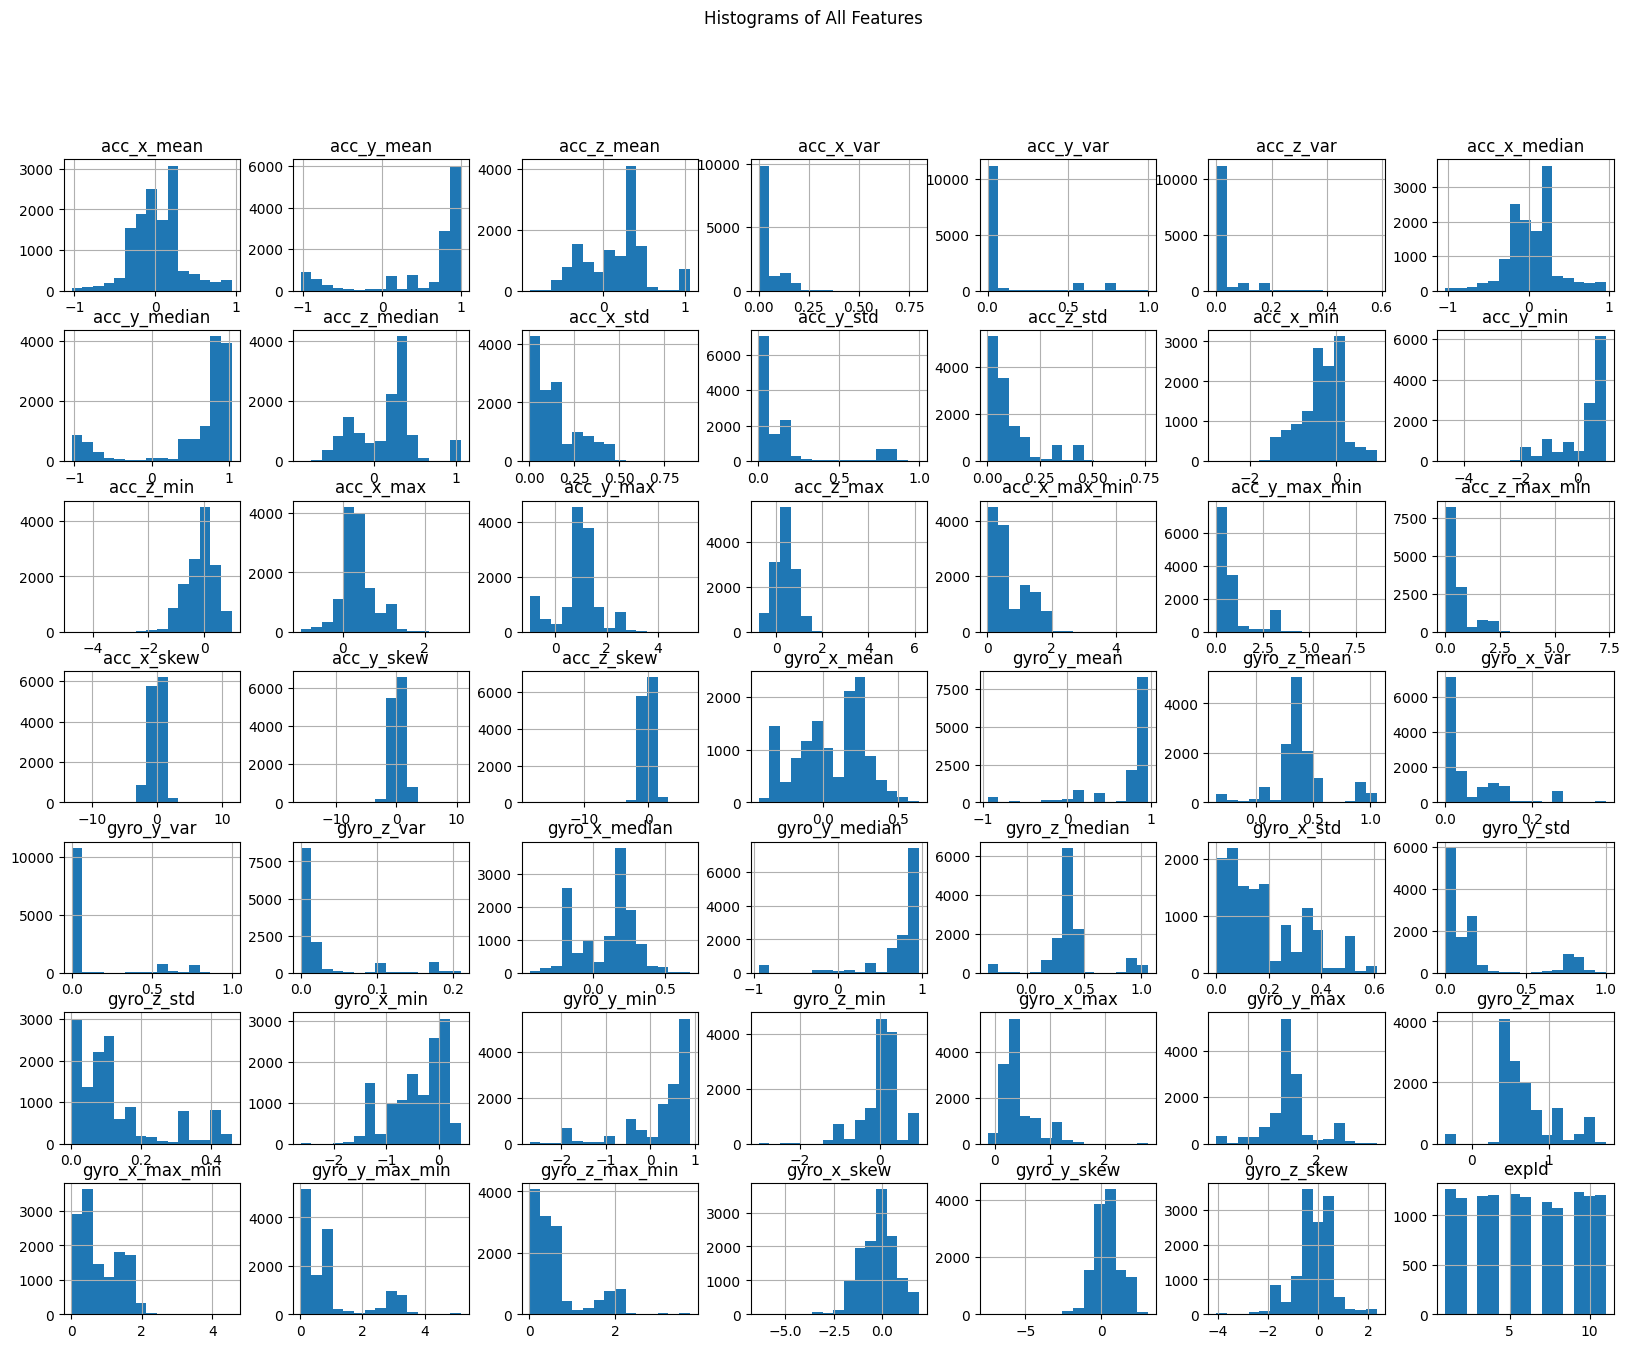

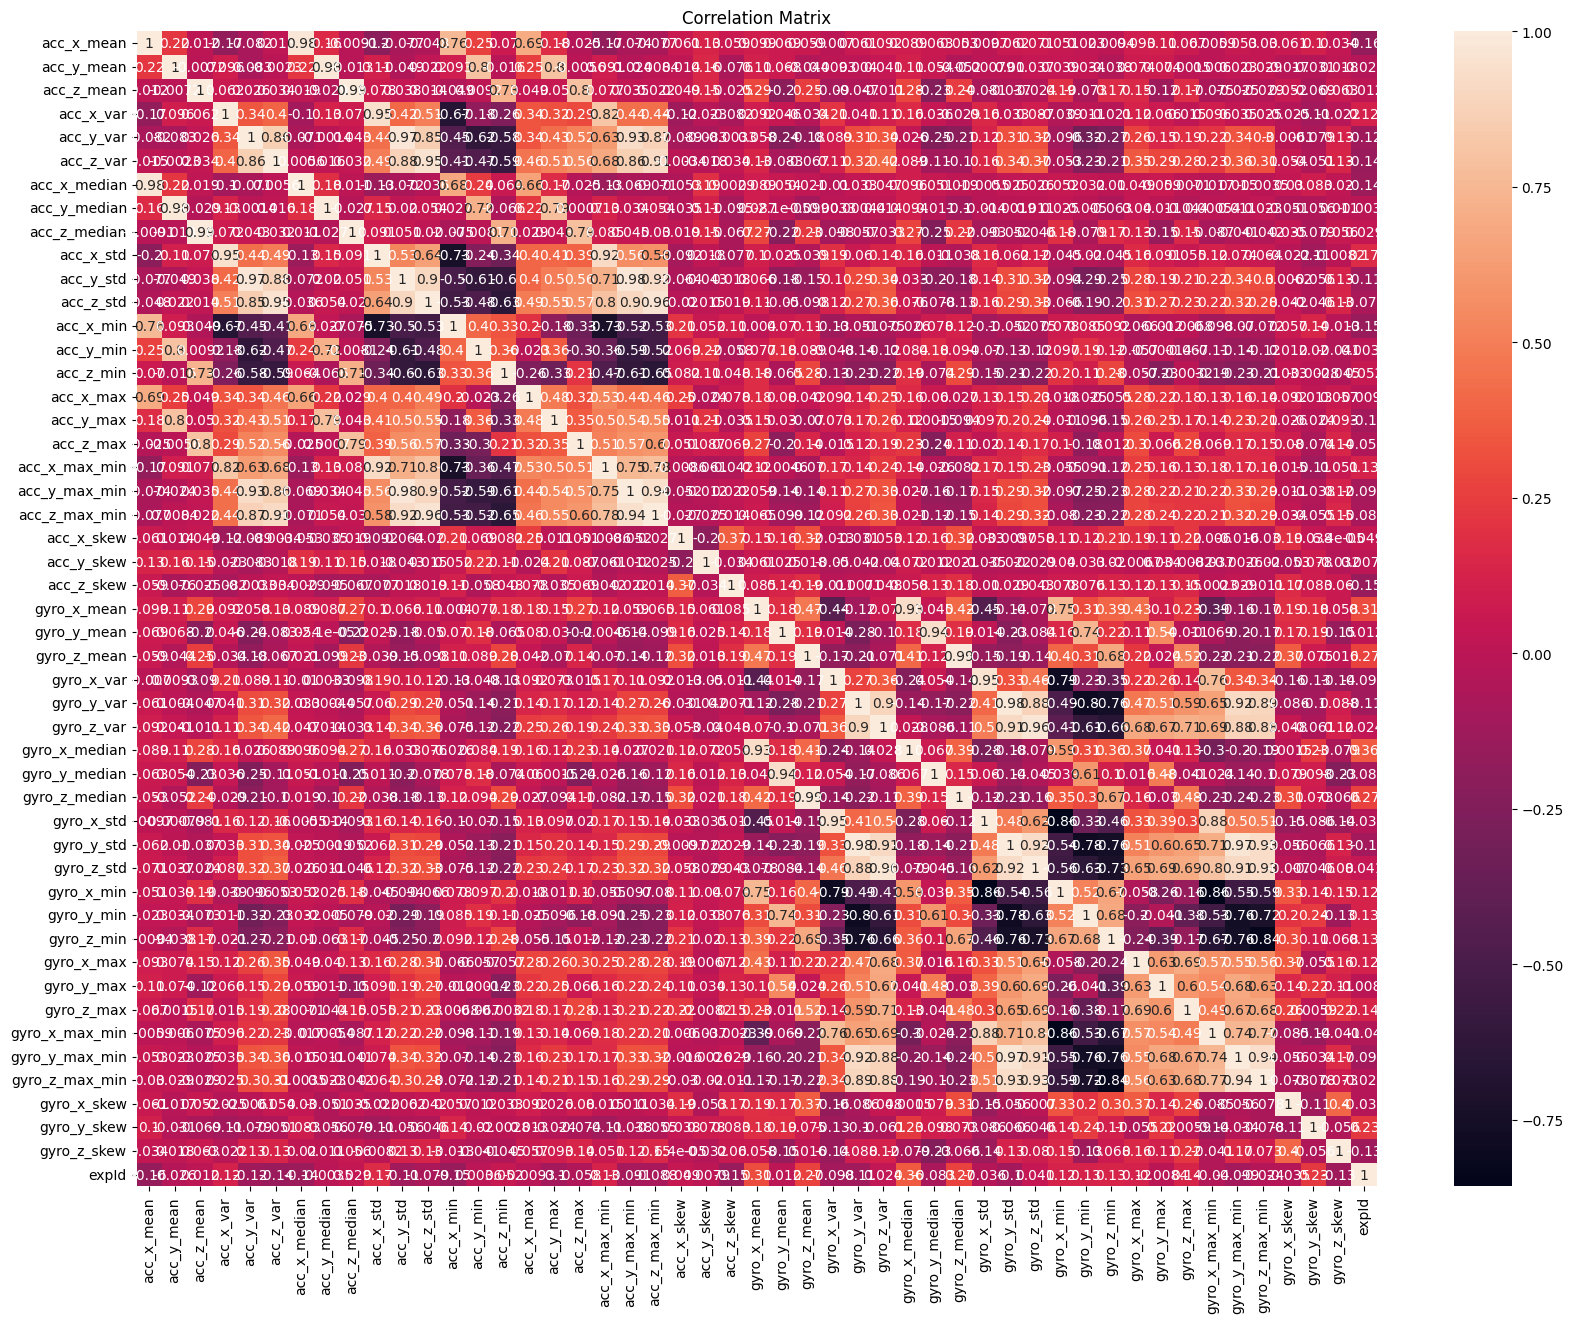

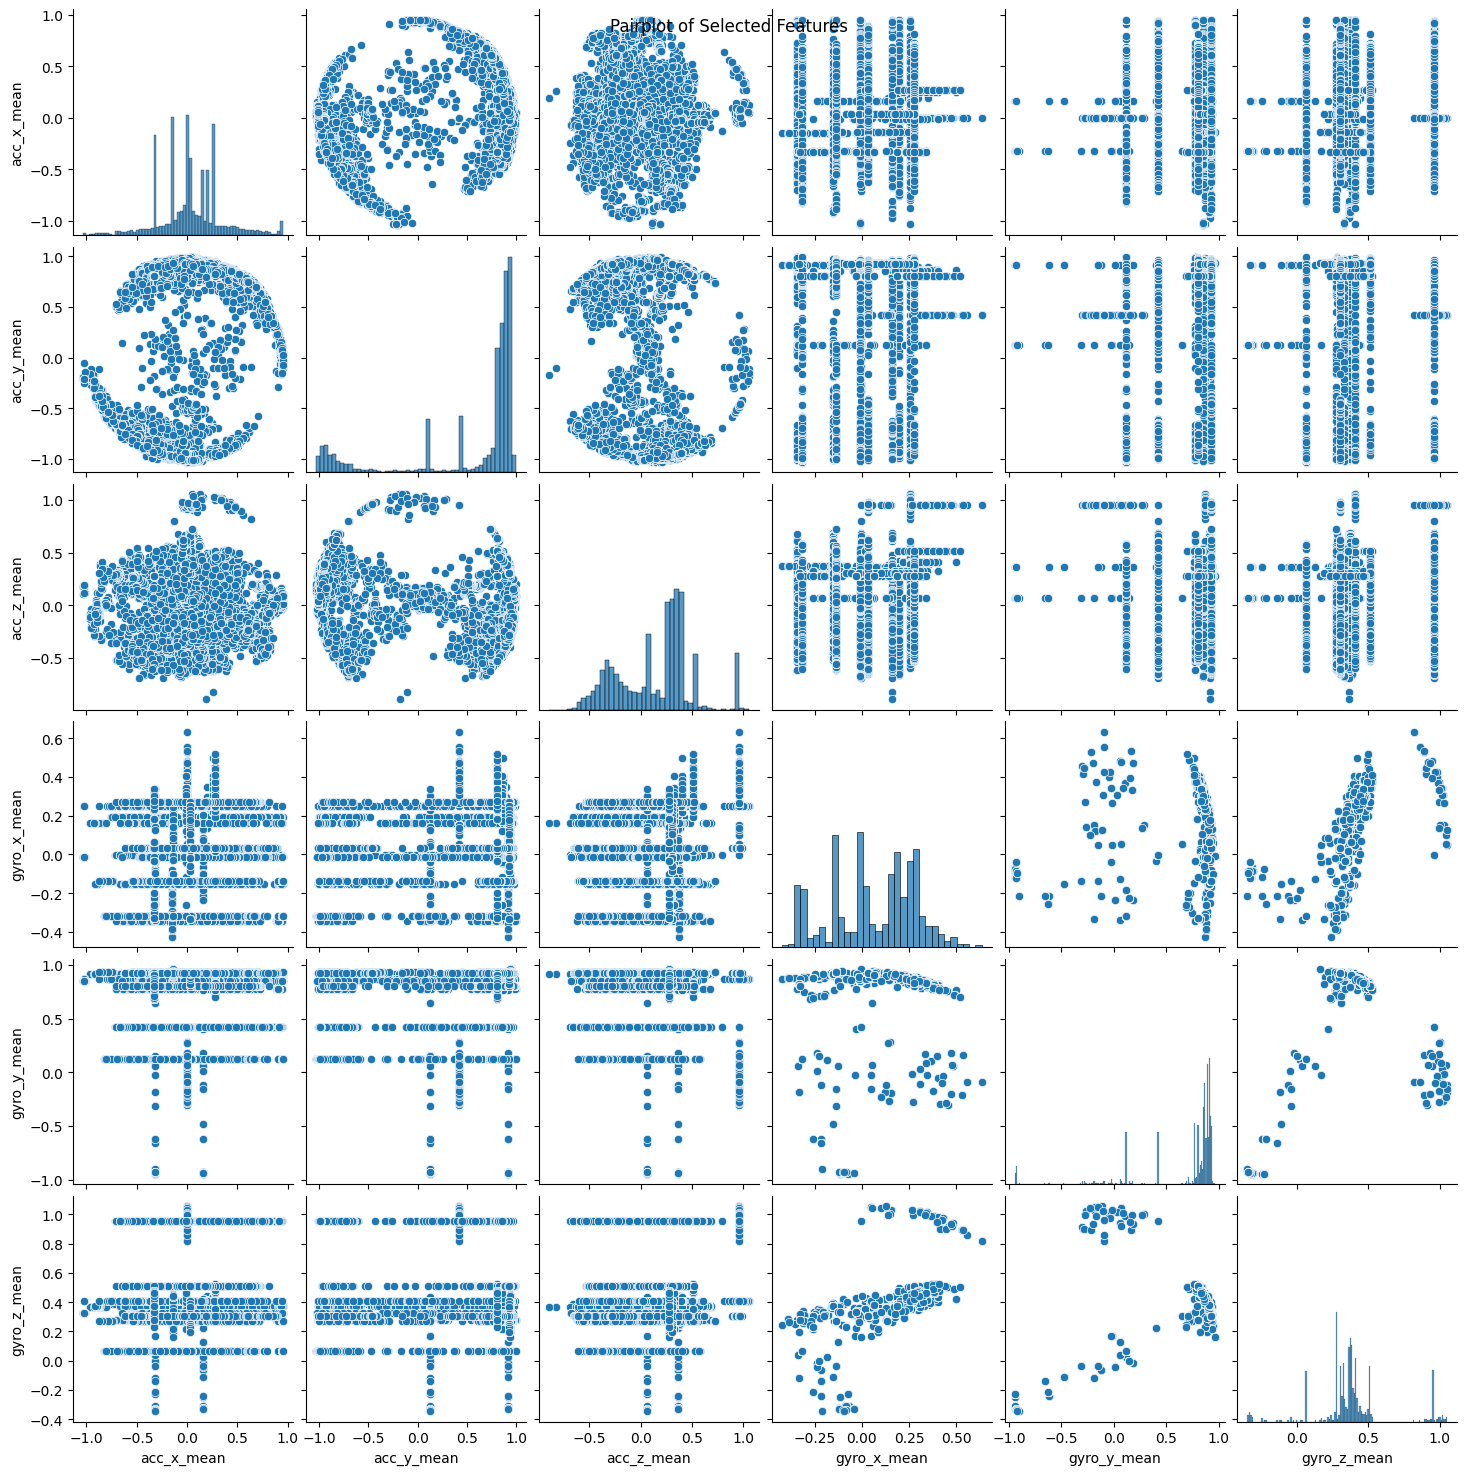

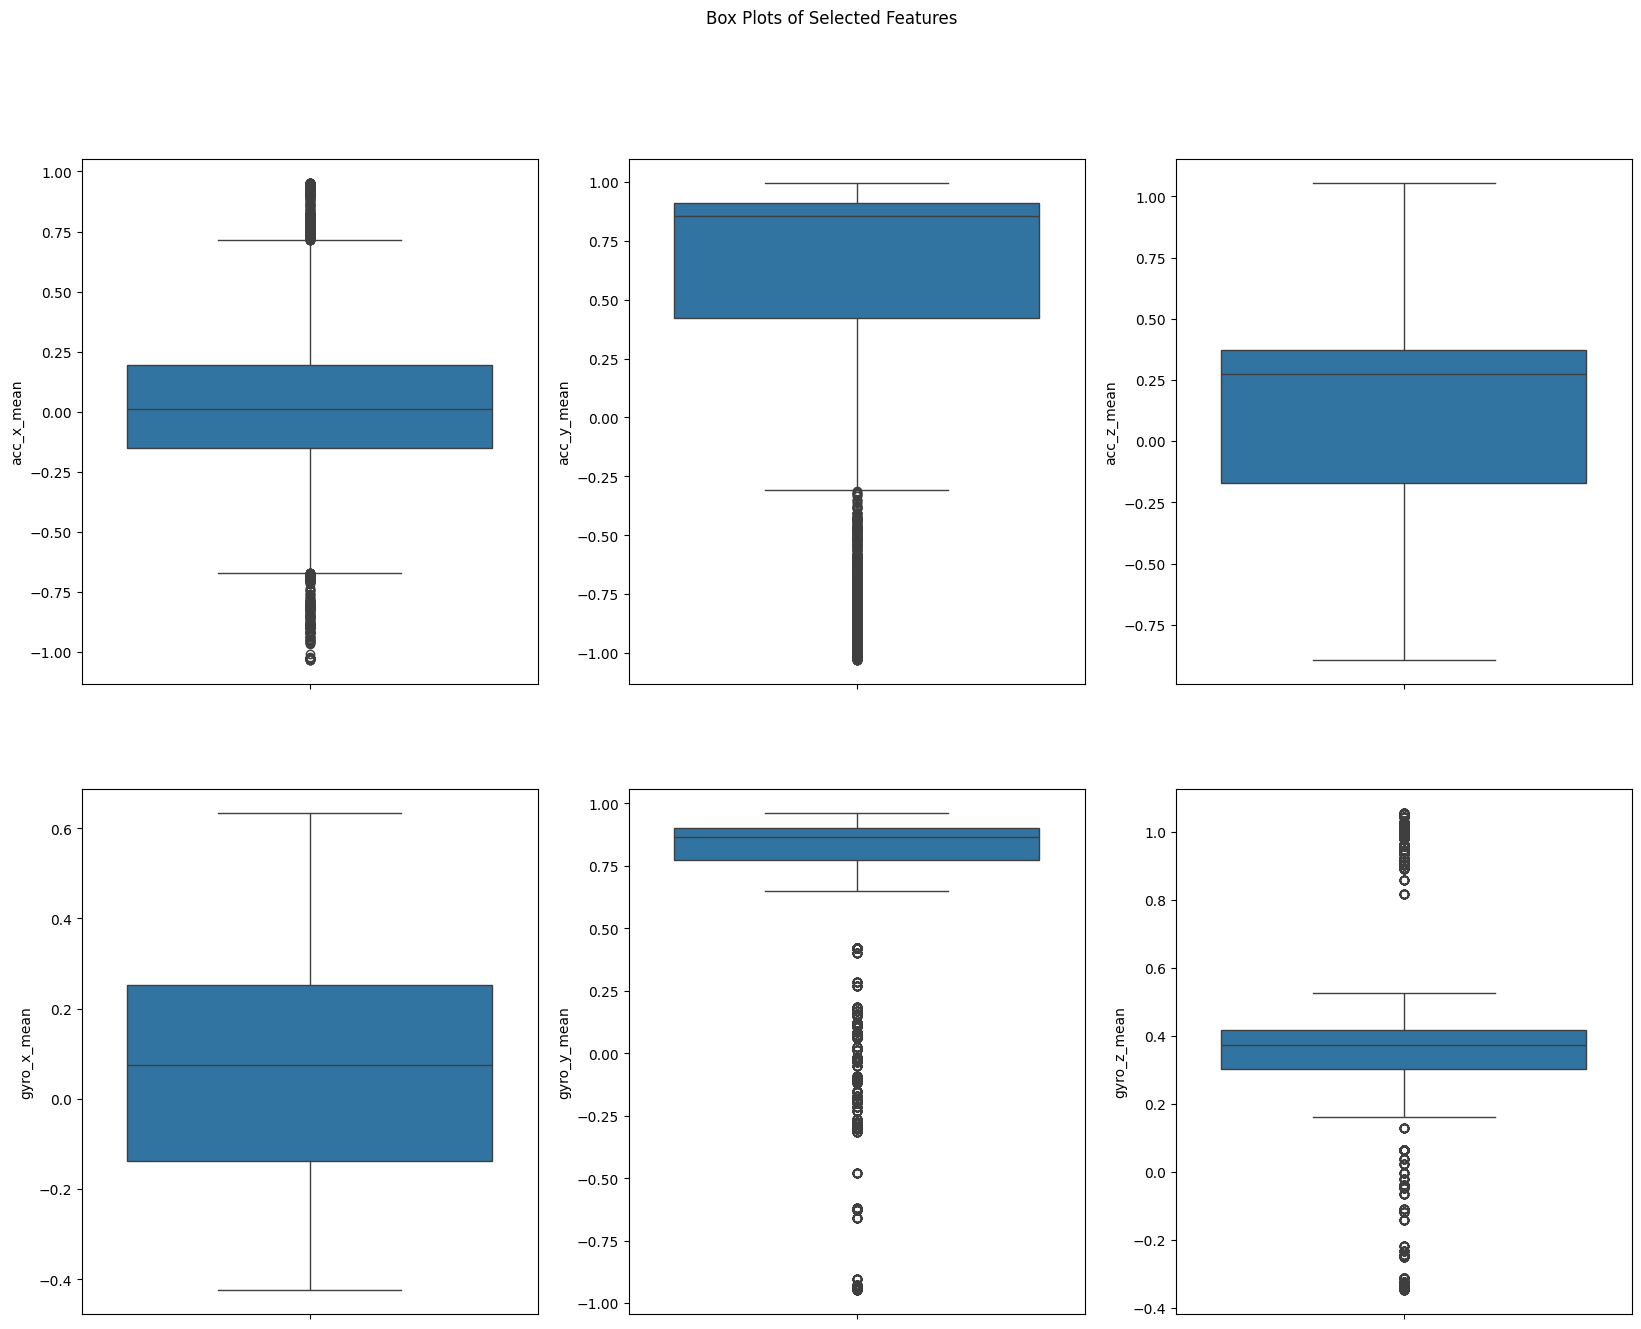

In [ ]:
! pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# please note that as u can see it looks like there are patterns on the data, beleived that some linear transformation like standarad scaler would help, so i used it

features_df.hist(bins=15, figsize=(20, 15))
plt.suptitle('Histograms of All Features')
plt.show()

plt.figure(figsize=(20, 15))
correlation_matrix = features_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

subset_features = ['acc_x_mean', 'acc_y_mean', 'acc_z_mean', 
                   'gyro_x_mean', 'gyro_y_mean', 'gyro_z_mean']
sns.pairplot(features_df[subset_features])
plt.suptitle('Pairplot of Selected Features')
plt.show()

plt.figure(figsize=(20, 15))
for i, feature in enumerate(subset_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=features_df[feature])
plt.suptitle('Box Plots of Selected Features')
plt.show()

In [42]:
print(sorted(features_df['expId'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [15]:
features_df['expId'].value_counts()

expId
0     646
4     646
6     632
10    631
8     624
9     622
2     618
1     615
5     611
3     600
7     583
Name: count, dtype: int64

In [ ]:
# here want to show how the features been made
# I add new features more than what have on the mid
# i made for loop over the window_size
# I wanted this time to use both the accelerometer and gyroscope to get as much as possible from the data
# this the only change from the last mid 
# please note that u can find here all what I have tried and changed fully if there is need https://github.com/aibak365/Machine-learning/blob/main/update_IMPLEMENTEDALGOS_machine_learning_course_ML_course_Final.ipynb
# please note i seperated file as been requested on canvas and to be clear
for window_size in [100,200,300,400,500]:
  overlap = 50
  window_size -=  overlap
  result_list = []
  for expId in df['expNo'].value_counts().index:
    accelerometer_expId = accelerometer[accelerometer['expNo']==expId]
    gyroscope_expId = gyroscope[gyroscope['expNo']==expId]
    for iii in range(2):
      if iii==0:
        size = len(accelerometer_expId)
      else:
        size = len(gyroscope_expId)
      for ii in range(size):
        if iii == 0:
          acc_df = pd.read_csv(accelerometer_expId.iloc[ii , 0])
          acc_df.columns = ['epoch', 'time', 'elapsed', 'x', 'y', 'z']
          accd_df = acc_df[['x', 'y', 'z']]
        if iii == 1:
          gyro_df = pd.read_csv(gyroscope_expId.iloc[ii , 0])
          gyro_df.columns = ['epoch', 'time', 'elapsed', 'x', 'y', 'z']
          gyro_df = acc_df[['x', 'y', 'z']]


        for i in range(0, len(accd_df) - window_size, window_size):
          if iii == 0:
            window_acc_data = accd_df.iloc[i:i+window_size]

            acc_x_mean = window_acc_data['x'].mean()
            acc_y_mean = window_acc_data['y'].mean()
            acc_z_mean = window_acc_data['z'].mean()
            acc_x_median = window_acc_data['x'].median()
            acc_y_median = window_acc_data['y'].median()
            acc_z_median = window_acc_data['z'].median()
            acc_x_min = window_acc_data['x'].min()
            acc_y_min = window_acc_data['y'].min()
            acc_z_min = window_acc_data['z'].min()
            acc_x_max = window_acc_data['x'].max()
            acc_y_max = window_acc_data['y'].max()
            acc_z_max = window_acc_data['z'].max()
            acc_x_max_min = window_acc_data['x'].max() - window_acc_data['x'].min()
            acc_y_max_min = window_acc_data['y'].max() - window_acc_data['y'].min()
            acc_z_max_min = window_acc_data['z'].max() - window_acc_data['z'].min()
            acc_x_skew = window_acc_data['x'].skew()
            acc_y_skew = window_acc_data['y'].skew()
            acc_z_skew = window_acc_data['z'].skew()

            acc_x_var = window_acc_data['x'].var()
            acc_y_var = window_acc_data['y'].var()
            acc_z_var = window_acc_data['z'].var()

            acc_x_std = window_acc_data['x'].std()
            acc_y_std = window_acc_data['y'].std()
            acc_z_std = window_acc_data['z'].std()
          if iii == 1:
            window_gyro_data = gyro_df.iloc[i:i+window_size]
            gyro_x_mean = window_gyro_data['x'].mean()
            gyro_y_mean = window_gyro_data['y'].mean()
            gyro_z_mean = window_gyro_data['z'].mean()
            gyro_x_median = window_gyro_data['x'].median()
            gyro_y_median = window_gyro_data['y'].median()
            gyro_z_median = window_gyro_data['z'].median()
            gyro_x_var = window_gyro_data['x'].var()
            gyro_y_var = window_gyro_data['y'].var()
            gyro_z_var = window_gyro_data['z'].var()

            gyro_x_std = window_gyro_data['x'].std()
            gyro_y_std = window_gyro_data['y'].std()
            gyro_z_std = window_gyro_data['z'].std()
            gyro_x_min = window_gyro_data['x'].min()
            gyro_y_min = window_gyro_data['y'].min()
            gyro_z_min = window_gyro_data['z'].min()
            gyro_x_max = window_gyro_data['x'].max()
            gyro_y_max = window_gyro_data['y'].max()
            gyro_z_max = window_gyro_data['z'].max()
            gyro_x_skew = window_gyro_data['x'].skew()
            gyro_y_skew = window_gyro_data['y'].skew()
            gyro_z_skew = window_gyro_data['z'].skew()
            gyro_x_max_min = window_gyro_data['x'].max() - window_gyro_data['x'].min()
            gyro_y_max_min = window_gyro_data['y'].max() - window_gyro_data['y'].min()
            gyro_z_max_min = window_gyro_data['z'].max() - window_gyro_data['z'].min()
          try:
            result_list.append([acc_x_mean, acc_y_mean, acc_z_mean, acc_x_var, acc_y_var, acc_z_var, acc_x_median,
                                acc_y_median,acc_z_median, acc_x_std, acc_y_std, acc_z_std, acc_x_min, acc_y_min, acc_z_min,
                                acc_x_max,acc_y_max, acc_z_max,acc_x_max_min, acc_y_max_min, acc_z_max_min,
                                acc_x_skew, acc_y_skew, acc_z_skew,
                                gyro_x_mean, gyro_y_mean, gyro_z_mean, gyro_x_var, gyro_y_var, gyro_z_var, gyro_x_median,
                                gyro_y_median, gyro_z_median, gyro_x_std, gyro_y_std, gyro_z_std, gyro_x_min, gyro_y_min, gyro_z_min,
                                gyro_x_max, gyro_y_max, gyro_z_max, gyro_x_max_min, gyro_y_max_min, gyro_z_max_min,
                                gyro_x_skew, gyro_y_skew, gyro_z_skew,
                                expId
                            ])
          except:
            print(expId)
  result_df = pd.DataFrame(result_list)

  result_df.columns = ["acc_x_mean", "acc_y_mean", "acc_z_mean", "acc_x_var", "acc_y_var", "acc_z_var", "acc_x_median",
                              "acc_y_median","acc_z_median", "acc_x_std", "acc_y_std", "acc_z_std", "acc_x_min", "acc_y_min", "acc_z_min",
                              "acc_x_max","acc_y_max", "acc_z_max","acc_x_max_min", "acc_y_max_min", "acc_z_max_min",
                              "acc_x_skew", "acc_y_skew", "acc_z_skew",
                              "gyro_x_mean", "gyro_y_mean", "gyro_z_mean", "gyro_x_var", "gyro_y_var", "gyro_z_var", "gyro_x_median",
                              "gyro_y_median", "gyro_z_median", "gyro_x_std", "gyro_y_std", "gyro_z_std", "gyro_x_min", "gyro_y_min", "gyro_z_min",
                              "gyro_x_max", "gyro_y_max", "gyro_z_max", "gyro_x_max_min", "gyro_y_max_min", "gyro_z_max_min",
                              "gyro_x_skew", "gyro_y_skew", "gyro_z_skew",
                              "expId"
                          ]

  result_df.to_csv("result_df"+str(window_size+50)+".csv", index=False)
  # please note that i was trying using duplicates(while as i understand the data are signals) to enhance the results, but no need so I dropped them


NameError: name 'df' is not defined